# SOURAV SHARMA

# TASK 2 : Data Science and Business Analytics Internship by 'The Spark Foundation'

# Using K-Means clustering

# Predict the optimum number of clusters and represent it visually from given 'IRIS' dataset


In [35]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn.cluster import KMeans



# Reading data

In [21]:
data=pd.read_csv("Iris.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [17]:
df = data.drop('Id',axis = 1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [37]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [39]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [22]:
x = df.iloc[:, [0,1,2,3]].values
y = df.iloc[:, -1].values


# Elbow Method

C:\Users\sourav\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "
C:\Users\sourav\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


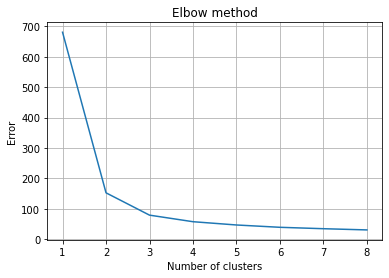

In [34]:
elbow  = []
for i in range(1,9):
    model = KMeans(n_clusters=i).fit(x)
    model.fit(x)
    elbow.append(model.inertia_)
    
plt.plot(range(1,9),elbow)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("Error")
plt.grid()
plt.show()

In [38]:
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10,random_state  = 42)
y_means = model.fit_predict(x)


# VISUALISING CLUSTER

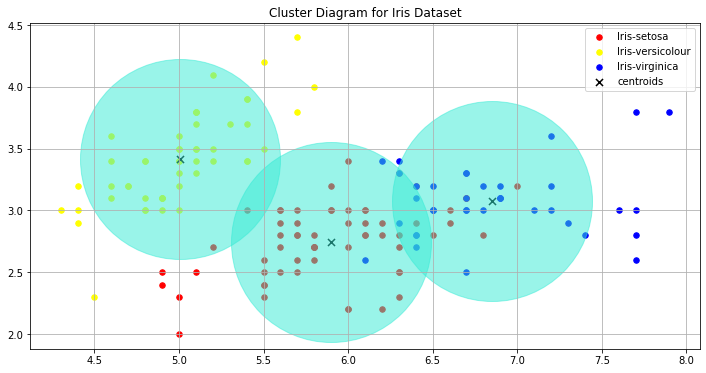

In [32]:
plt.figure(figsize =(12,6))
plt.scatter(x[y_means==0,0], x[y_means==0,1],s =30,c ='red',label = 'Iris-setosa')
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=30,c='yellow',label ='Iris-versicolour')
plt.scatter(x[y_means==2,0],x[y_means==2,1],s = 30,c = 'blue',label = 'Iris-virginica')


#plotting centroids
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s = 50, c = 'black',label = 'centroids',marker = 'x')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s = 40000,c = '#34ebd5',alpha =0.5,marker ='o')
plt.title("Cluster Diagram for Iris Dataset")
plt.grid()
plt.legend()
plt.show()